# Report 6: Magnetic Pendulum

## Jillian Annis

### Introduction

A magnetic pendulum consists of a magnet suspended from a pivot located at the center, or origin.  Three other magnets are fixed at different (x,y) positions, and they attract the suspended magnet.  The position of the hanging magnet and the overall state of the system can be represented by the vector 

$$P = \begin{bmatrix} x \\ y \\ v_x \\ v_y \end{bmatrix}$$

There are three main forces that act on the pendulum system:

1) Gravity, represented by C.

2) Frictional forces at the pivot and air resistance, represented by R.

3) Force due to the magnetic dipoles

Adding up the forces, we can obtain a governing differential equation that describes the changing system.

$$\frac{dP}{dt} = \begin{bmatrix} v_x \\ v_y \\ -Cx - Rv_x + \sum_i \frac{x-x_i}{{r_i}^5} (1-\frac{5d^2}{{r_i}^2}) \\ -Cy - Rv_y + \sum_i \frac{y-y_i}{{r_i}^5} (1-\frac{5d^2}{{r_i}^2})\end{bmatrix}$$

### Task Statement

The report has the following goals:

1) Simulate and plot the path of the pendulum using the improved Euler method using different initial states, or different P vectors.

2) While holding d and P constant, choose different values of C and R and make observations of the resulting paths.

3) Animate one of the paths taken by the pendulum from (2).

4) Divide the xy-plane into a grid where each cell represents the starting position of the magnet.  Then color each cell according to the final position of the pendulum.  Create one high resolution image.

5) Repeat (4) for different R values and make observations for each result.

### Method

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
def dP_dt(P, C, R, d):
    
    x, y, vx, vy = P
    
    xLoc=[1,-0.5,-0.5]
    yLoc=[0, sqrt(3)/2, -sqrt(3)/2]
    
    ax=-C*x-R*vx
    ay=-C*y-R*vy
    
    for i in range(0,3):
        r=sqrt((x-xLoc[i])**2+(y-yLoc[i])**2+d**2)
        ax+=((x-xLoc[i])/r**5)*(1-((5*d**2)/r**2))
        ay+=((y-yLoc[i])/r**5)*(1-((5*d**2)/r**2))
   
    return array([vx, vy, ax, ay])

The **dP_dt** function is used to calculate the values in the governing differential equation (GDE) defined above.  The function takes the variables:

* **P**, the inital state of the system.  **P** is an array of the x and y positions and the x and y velocities.
* **C**, the force due to gravity.
* **R**, the frictional forces 
* **d**, the distance in the z direction (the z axis would be pointing out of the xy-plane which means it is the vertical distance)

The lists **xLoc** and **yLoc** hold the x and y locations of the three stationary magnets.  Magnet 1 is at (1,0), magnet 2 is at (-0.5, $\frac{\sqrt{3}}{2}$ ), and magnet 3 is at (-0.5, $-\frac{\sqrt{3}}{2}$ ).

**ax** and **ay** are the last two lines in the GDE.  **ax** is the sum of the gravitational, frictional, and dipole forces in the x direction, and **ay** is the sum of these forces in the y direction.

Using the four input variables and the location lists, the forces of the magnetic dipoles can be calculated.  The *for loop* does just that.  For each magnet, the value of the equations $\frac{x-x_i}{{r_i}^5} (1-\frac{5d^2}{{r_i}^2})$ and $\frac{y-y_i}{{r_i}^5} (1-\frac{5d^2}{{r_i}^2})$ are calculated.  In the equations, **$x_i$** and **$y_i$** are the location coordinates of the magnets, and **r** is the square root of the sum of the distances in the x, y, and z directions squared.  The resulting values are then added to the **ax** and **ay** terms respectively.

The function returns the x and y velocities and the sum of all the forces in the x and y directions.

In [10]:
def CalculatePath(tmax, h, P, C, R, d):
    steps=int(tmax/h)
    path=empty((steps,4))
    path[0]=P
    for i in range(1, steps):
        F1=h*dP_dt(P,C,R,d)
        F2=h*dP_dt(P+F1,C,R,d)
        P+=(F1+F2)/2.
        path[i]=P
    return path

**CalculatePath** is the function that applies the improved Euler method to find the path that the pendulum takes based on the initial state, **P**.  This function takes two additional variables: **tmax** and **h**.  **tmax** is the maximum amount of time that the simulation will be run.  A higher **tmax** equals a longer run time.  The variable **h** is the step size.  A smaller step size allows the simulation to be more accurate, but it will take longer to run.  In this report, a step size of 0.01 will be used.  This is because it is small enough for an accurate pendulum path to be calculated, but it is not too small that it takes forever to obtain a result.

In [11]:
def PlotPath(tmax, h, P, C, R, d):
    plot(1,0, 'ro')
    plot(-0.5, sqrt(3)/2, 'go')
    plot(-0.5,-sqrt(3)/2, 'bo')
    path=CalculatePath(tmax, h, P, C, R, d)
    plot(path[:,0], path[:,1], color='k')

**PlotPath** is used to plot the pendulum path created by the **CalculatePath** function.  It also plots the three stationary magnets, and these are represented by a red, green, or blue circle.  The path taken by the pendulum will be a black line.  

Below, the **PendulumAnimate** function contains the necessary code to animate the path of the pendulum as calculated by the **CalculatePath** function.  The magnets are the same color as the magnets in **PlotPath**, and the path of the pendulum is a black circle followed by a black line.

In [12]:
def PendulumAnimate(h, P, C, R, d): 
    
    tmax=100
    path=CalculatePath(tmax, h, P0, C, R, d)

    frames=int(tmax/h)
    fig,ax=subplots(figsize=(8,8))
    ax.set_aspect('equal')
    point,=plot([],[],'ko')#point, assigns it to the first element in the list, not the whole list
    line,=plot([],[],'k')
    plot(1,0, 'mo')
    plot(-0.5, sqrt(3)/2, 'bo')
    plot(-0.5,-sqrt(3)/2, 'go')

    width=0.25+amax(abs(path[:,:2])) #finds the largest x or y value and adds 0.25 
    xlim(-width,width)
    ylim(-width,width)

    def animate(frame, point, line, path): #gets called for every frame and it gets the updated frame
        x,y=path[frame,:2]
        point.set_data(x,y)
        line.set_data(path[:frame,0], path[:frame,1])
        return point, line,

    return animation.FuncAnimation(fig, animate, frames=frames, fargs=(point,line,path), interval=0, repeat=True)

In [13]:
def CalculateFinalPosition(tmax, h, P, C, R, d):
    steps=int(tmax/h)
    for i in range(1,steps):
        F1=h*dP_dt(P,C,R,d)
        F2=h*dP_dt(P+F1,C,R,d)
        P+=(F1+F2)/2
    return P

**CalculateFinalPosition** is used to find the final position of the pendulum based on its starting position.  It will be used with the **ColorGrid** function below to visually show what magnet the pendulum will end up over if the pendulum is started in a specific location.

First, **ColorGrid** breaks up the xy-plane into a grid using *linspace* to set the number of x-points (**xpts**) and y-points (**ypts**).  To obtain a high resolution image, the **tmax** and **npts** must be large.  In this report, **tmax** and **npts** will be 100 to create this high resolution image.

In [14]:
def ColorGrid(tmax, npts, h, C, R, d): #tmax,npts,h,C,R,d

    width=5
    xpts=linspace(-width,width,npts)
    ypts=linspace(-width,width,npts)
    X,Y=meshgrid(xpts,ypts)
    VX,VY=zeros((2,npts,npts))
    P0=array([X,Y,VX,VY])

    P=CalculateFinalPosition(tmax,h,P0,C,R,d)

    Magnets=array([[1,0],[-0.5,sqrt(3)/2],[-0.5,-sqrt(3)/2]])
    MagnetColors=array([[1,0,0],[0,1,0],[0,0,1]], dtype=float) #Magnet 1 is red, Magnet 2 is green, Magnet 3 is blue

    X,Y=P[:2]
    xmags=Magnets[:,0]
    ymags=Magnets[:,1]
    nmags=len(Magnets)
    xdiffs=X-xmags.reshape(nmags,1,1)
    ydiffs=Y-ymags.reshape(nmags,1,1)
    DistanceSquared=xdiffs**2+ydiffs**2
    Closest=argmin(DistanceSquared, axis=0) #tells you the index of the min value

    figure(figsize=(8,8))
    img=MagnetColors[Closest] #indexing the magnet colors by the closest array
    imshow(img,interpolation='none')
    xticks([])
    yticks([])

### Results

#### Exercise 1

For all the initial states, **tmax** is 100, **h** is 0.01, **C** is 1, **R** is 0.5, and **d** is 1.

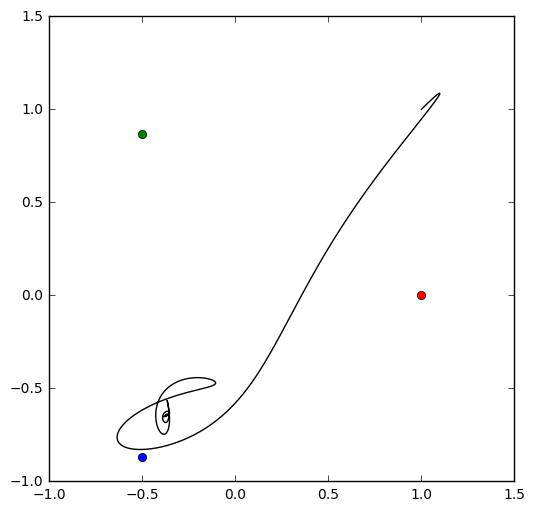

In [15]:
#Initial State 1
figure(figsize=(6,6))
gca().set_aspect('equal')
P0=array([1., 1., 0.5, 0.5]) #x, y, vx, vy
PlotPath(100, 0.01, P0, 1, 0.5, 1) #tmax, h, P0, C, R, d

For intial state 1, the pendulum starts at (1,1) and both velocities are set to 0.5.  Even though the pendulum starts near the red magnet, it ends up at the blue magent.  This could be because the velocities were not large enough to overcome the magnetic force of the blue magnet.  The pendulum was slowed down due to the gravitational and frictional forces, and thus it could not escape the pull of the blue magnet.

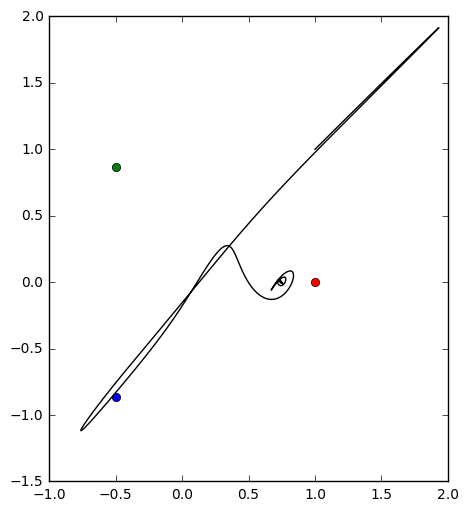

In [46]:
#Initial State 2: Increase the Velocity from IS1
figure(figsize=(6,6))
gca().set_aspect('equal')
P0=array([1., 1., 2., 2.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, 1, 0.5, 1) #tmax, h, P0, C, R, d

For initial state 2, the velocities in initial state 1 were increased from 0.5 to 2, but the pendulum was still released from (1,1).  In this state, the magnet has enough kinetic energy, due to the increased velocity, to overcome the blue magnet's pull, but it did not have enough energy to move away from the red magnet.

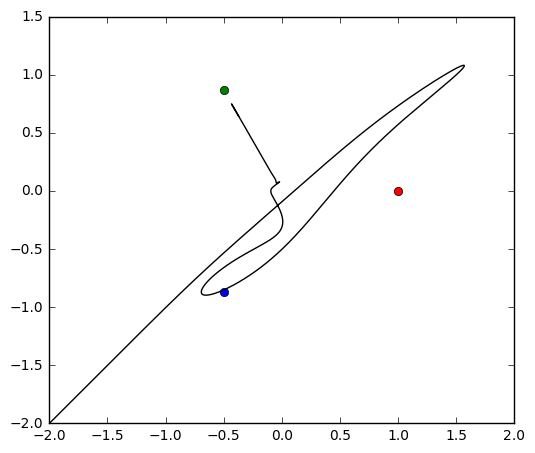

In [47]:
#Initial State 3: Move the x,y position from IS2
figure(figsize=(6,6))
gca().set_aspect('equal')
P0=array([-2., -2., 2., 2.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, 1, 0.5, 1) #tmax, h, P0, C, R, d

For this initial state, the pendulum is released from (-2,-2), and the velocities remain at 2 as in initial state 2.  By changing the x,y position the pendulum ends at the green magnet, as opposed to the red magnet in the state before.

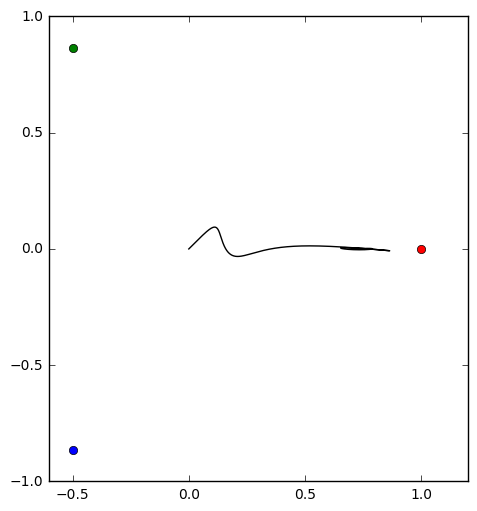

In [48]:
#Initial State 4: x,y at origin and very small velocities
figure(figsize=(6,6))
gca().set_aspect('equal')
P0=array([0., 0., 0.1, 0.1]) #x, y, vx, vy
PlotPath(100, 0.01, P0, 1, 0.5, 1) #tmax, h, P0, C, R, d

In initial state 4, the pendulum was moved to the origin, and was given very small initial velocities.  Due to the small velocities, the pendulum does not have enough kinetic energy to counter the red magnet's pull.  

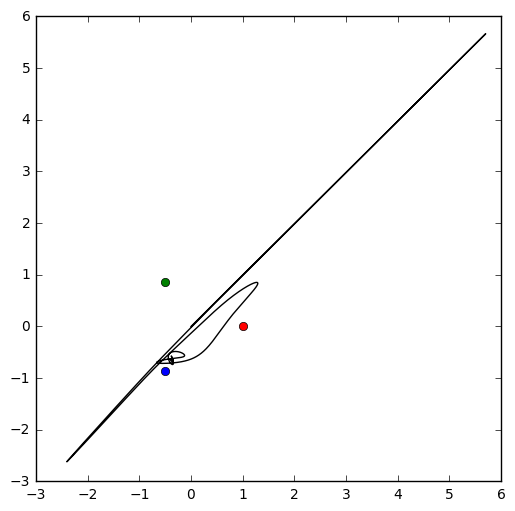

In [49]:
#Initial State 5: x,y at origin and very large velocities
figure(figsize=(6,6))
gca().set_aspect('equal')
P0=array([0., 0., 8., 8.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, 1, 0.5, 1) #tmax, h, P0, C, R, d

For this initial state, the pendulum was started at (0,0), but the velocities were significantly increased to 8.  It has enough energy to bypass the red magnet, but it is slowed down enough by gravity and friction for it to stop at the blue magnet.

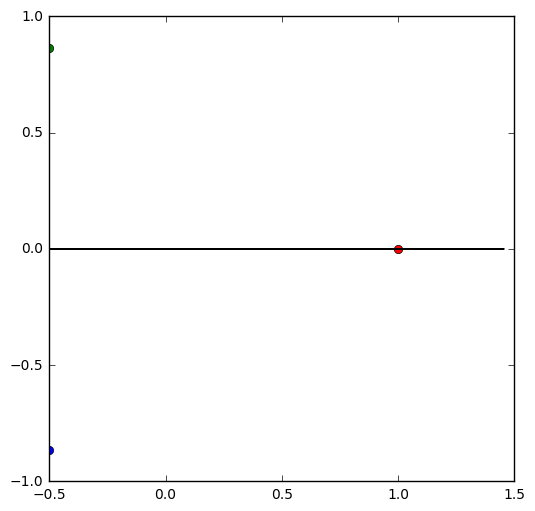

In [50]:
#Initial State 6: x,y at origin and only x velocity
figure(figsize=(6,6))
gca().set_aspect('equal')
P0=array([0., 0., 2., 0.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, 1, 0.5, 1) #tmax, h, P0, C, R, d

In this state, the x velocity is set to 2 while the others are 0.  Because it there is only velocity in the x direction, it makes sense that the pendulum ends up over the red magnet since its y location is 0.  The pendulum can't move in the y direction unless it is given a nonzero y velocity or a force with a nonzero y component acts upon it.  Since neither is present, the pendulum moves horizontally.

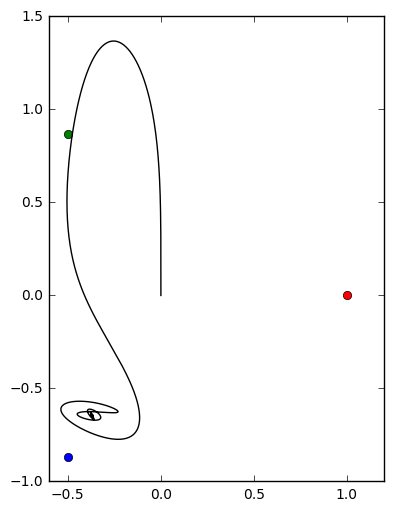

In [51]:
#Initial State 7: x,y at origin and only y velocity
figure(figsize=(6,6))
gca().set_aspect('equal')
P0=array([0., 0., 0., 2.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, 1, 0.5, 1) #tmax, h, P0, C, R, d

In this initial state, everything is zero except for the vertical velocity.  Unlike the state before, a force with a nonzero x component acts upon the pendulum and changes its x position, and this force is the force exerted by the green magnet.  The green magnet causes the pendulum to be pulled back towards it, but the pendulum has enough energy to move past it.  The pendulum soon reaches the blue magnet where it eventually comes to rest.

#### Exercise 2

In this exercise, **P0** is set to [1, 0, 1, 1], **tmax** is 100, **h** is 0.01, and **d** is 1.

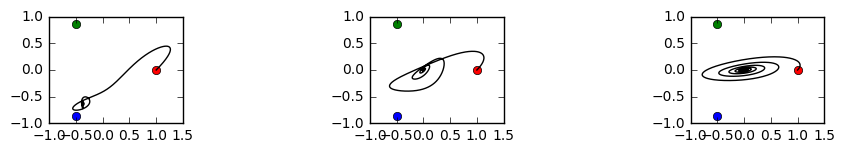

In [52]:
#Hold R constant
figure(figsize=(10,10))

C=1
R=0.5
subplot(1,5,1)
gca().set_aspect('equal')
P0=array([1., 0., 1., 1.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, C, R, 1) #tmax, h, P0, C, R, d

C=3
R=0.5
subplot(1,5,3)
gca().set_aspect('equal')
P0=array([1., 0., 1., 1.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, C, R, 1) #tmax, h, P0, C, R, d

C=10
R=0.5
subplot(1,5,5)
gca().set_aspect('equal')
P0=array([1., 0., 1., 1.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, C, R, 1) #tmax, h, P0, C, R, d

In these three plots, the frictional force, R, was held constant while C, the force of gravity, was changed.  As C increased, the pendulum loses its ability to move away from the origin.  This makes sense because the gravitational force pulls the pendulum towards the origin, and as it is increased, the pull on the pendulum becomes stronger.  At some large value of C, the pendulum will immediately stop at the origin even if it is given a large initial velocity because the gravitational force will be too strong for the pendulum to overcome.  Conversely, as C becomes smaller, the pull towards the origin decreases, and at very small C, gravity will have no effect on the final position of the pendulum.

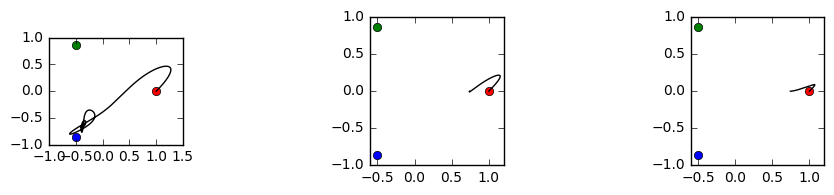

In [53]:
#Hold C constant
figure(figsize=(10,10))

C=1
R=0.4
subplot(1,5,1)
gca().set_aspect('equal')
P0=array([1., 0., 1., 1.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, C, R, 1) #tmax, h, P0, C, R, d

C=1
R=3
subplot(1,5,3)
gca().set_aspect('equal')
P0=array([1., 0., 1., 1.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, C, R, 1) #tmax, h, P0, C, R, d

C=1
R=10
subplot(1,5,5)
gca().set_aspect('equal')
P0=array([1., 0., 1., 1.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, C, R, 1) #tmax, h, P0, C, R, d

For these plots, C was held constant while R was changed.  As R increases, the frictional forces become so large that pendulum motion is greatly inhibited.  At some large value of R, friction will be so large that the pendulum would not move from its initial position.  On the other hand, when R is very small, the system will be frictionless, and thus the pendulum will only be influenced by gravity and the magnetic forces.

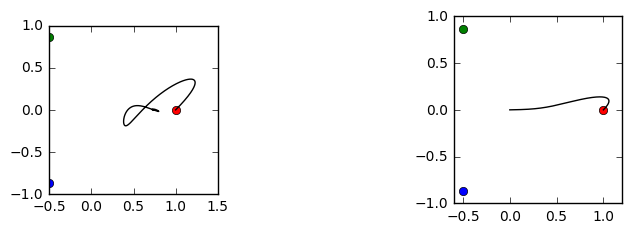

In [54]:
#Both Equal
figure(figsize=(10,10))

C=1
R=1
subplot(1,4,1)
gca().set_aspect('equal')
P0=array([1., 0., 1., 1.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, C, R, 1) #tmax, h, P0, C, R, d

C=5
R=5
subplot(1,4,3)
gca().set_aspect('equal')
P0=array([1., 0., 1., 1.]) #x, y, vx, vy
PlotPath(100, 0.01, P0, C, R, 1) #tmax, h, P0, C, R, d


In these two plots, both R and C are set to the same value.  Because they are both the same, we turn to the governing differential equation to determine which one will have a greater effect.  

C will have a greater influence if the pendulum's initial position is far from the origin and the initial velocities are small.  

Then, 

$$-Cx > -Rv_x and -Cy > -Rv_y$$

R will have a greater influence if the pendulum has large initial velocities and the pendulum's initial position is near the origin.

Then, 

$$-Cx < -Rv_x and -Cy < -Rv_y$$

#### Exercise 4

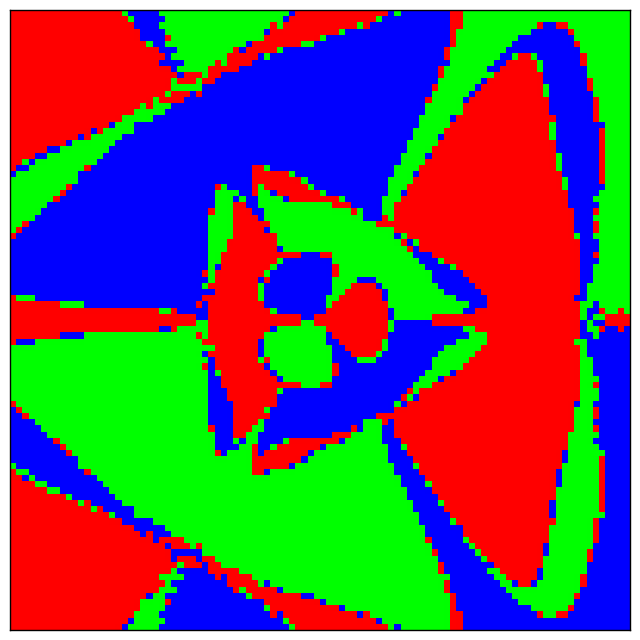

In [55]:
ColorGrid(100, 100, 0.01, 1, 0.5, 1) #tmax, npts, h, C, R, d

In this high resolution image, **tmax** is 100, **h** is 0.01, **C** and **d** are 1, and **R** is 0.5.  We can clearly see the borders and shape of each red, green, and blue area, as opposed to the very blocky images in exercise 5.  There is also a very defined repeating pattern.  Each large area is somewhat triangularly shaped, and on two of the corners there are smaller areas consisting of the other two colors.  To better explain this:

* Every large green area has a small red area in the upper left, and a small blue area in the uppper right.
* Every large red area has a small green section to the upper right, and a small blue area to the upper left.
* Every large blue area has a small red area in the upper right, and a small green area in the upper left.

As the areas become increasingly larger, it seems as if the pattern is rotated about 180 degrees counterclockwise to obtain the next orientation of the pattern.

#### Exercise 5

For all of the following images, **tmax** is 50, **npts** is 25, **h** is 0.01, **C** is 1, and **d** is 1.

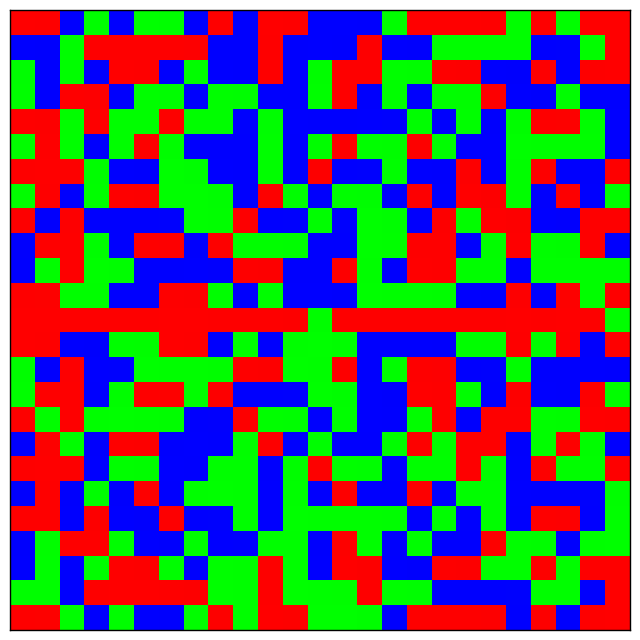

In [56]:
ColorGrid(50, 25, 0.01, 1, 0.1, 1) #tmax, npts, h, C, R, d

For small R, 0.1 in this case, the final position of the pendulum appears to be random.  However, the patterns above and below y=0 seem to be mirror images of each other, with the only difference being the color.  In the mirror images, blue changes to green, and vice versa, while anything that was red above y=0 remains red below this line.

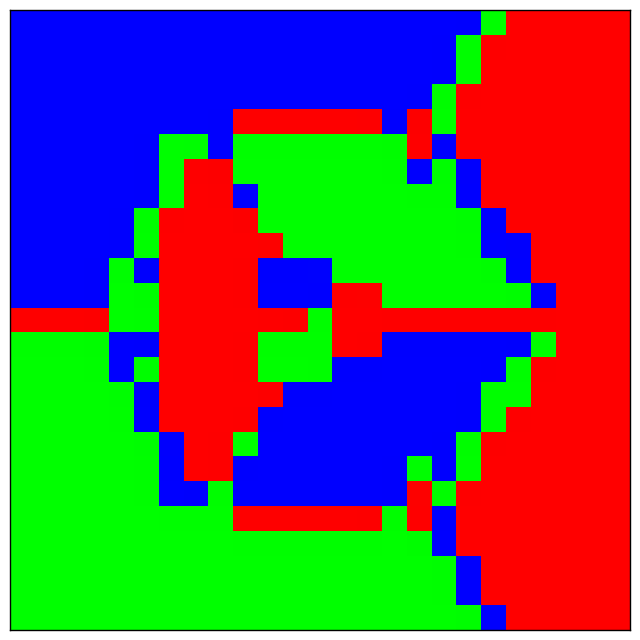

In [57]:
ColorGrid(50, 25, 0.01, 1, 0.65, 1) #tmax, npts, h, C, R, d

After increasing R slightly to 0.65, the random pattern disappears, and large areas of red, green, and blue appear.  These large areas mean that no matter where you start the pendulum in this area, it will always go to the same magnet.

(Side thought: It looks like a peace sign)

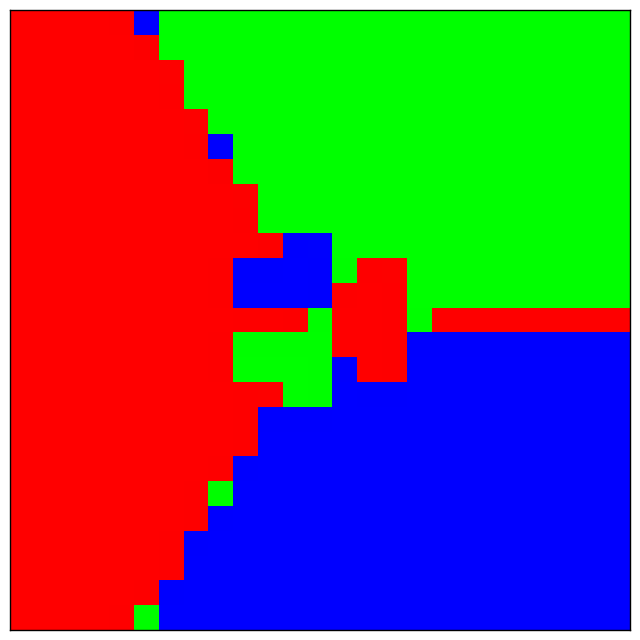

In [58]:
ColorGrid(50, 25, 0.01, 1, 1, 1) #tmax, npts, h, C, R, d

Increasing R to 1 causes the areas of solid colors to increase in size and change locations.  The red area moves from the right to the left, the blue area moves to the lower right from the top left, and the green moves from the bottom left to the top right.  About the origin, three small areas of each color appear, though these areas somewhat exsisted in the image above.

It can be concluded that increasing R decreases the random end behavior of the pendulum and causes many inital states to have the same final stopping magnet.

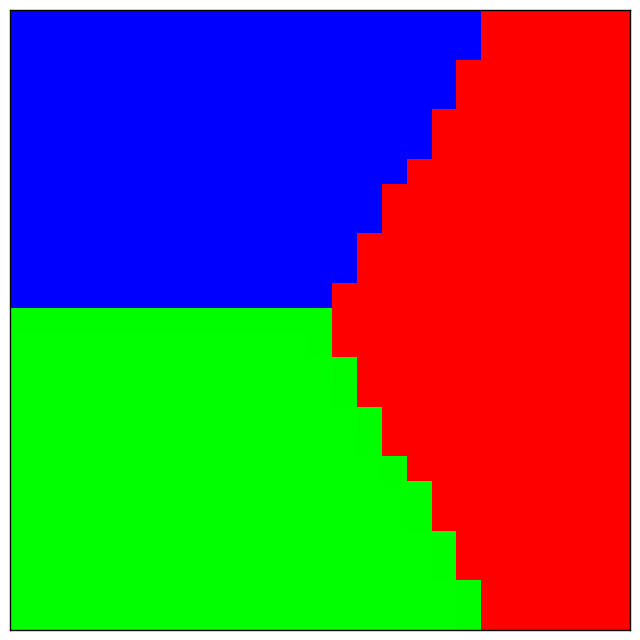

In [59]:
ColorGrid(50, 25, 0.01, 1, 10, 1) #tmax, npts, h, C, R, d

As R continues to be increased, the 3 large areas comprise the entirety of the grid.  Once again, the positions of these areas has changed.  Red goes from the left to the right side, green moves to the bottom left from the top right, and blue moves to the top left from the bottom right.

One would expect, since R is very large, that the pendulum would not move far from the nearest magnet, but this image does not completely reflect that.  This images suggests that if the pendulum is started near magnet 3, which is the blue magnet, the pendulum ends up at the green magnet, or magnet 2.  The same is true if the pendulum is started near magnet 2, it ends up near magnet 3.  Only starting the pendulum near magnet 1 causes the pendulum to stay at magnet 1.

#### Exercise 3

In [16]:
%pylab
from matplotlib import animation #import the animation function needed to animate the path

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


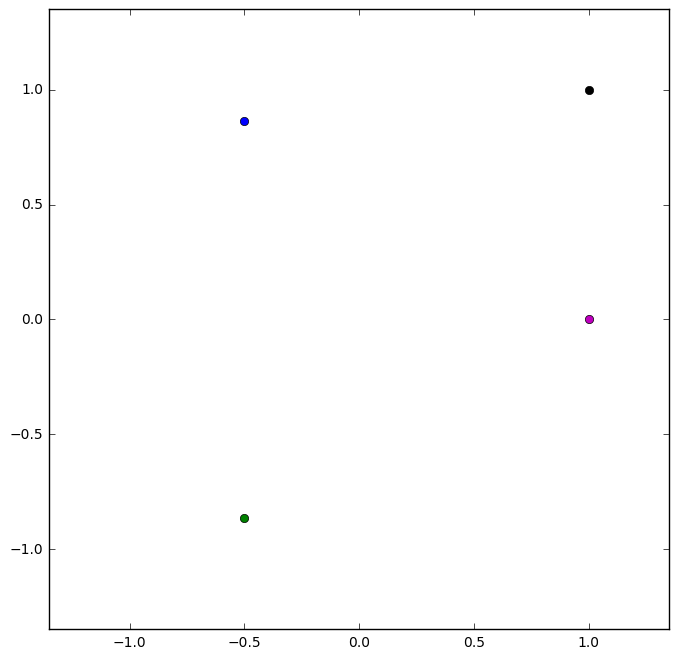

In [18]:
P0=array([1., 1., 0.5, 0.5]) #Initial State 1
PendulumAnimate(0.01, P0, 1., 0.5, 1.) #h, P, C, R, d

The above code is used to plot the path shown in Initial State 1 in exercise 1.  Since the velocities are small, the animated pendulum moves slowly towards the green magnet where it eventually comes to rest.

Note: The **PendulumAnimate** function does not allow the animation to automatically start over and run again, so every time you want to see the animation, you must re-execute the above cell.

### Conclusion

In this report, the magnetic pendulum was simulated and explored.  First, the path of the pendulum was plotted using the improved Euler method for several different initial states.  Next, different values of C and R were chosen in order to see what effect their magnitude had on the end position of the pendulum.  Then, one of the paths was chosen to be animated in order to visualize the real pendulum motion.  After this, the xy-plane was divided into a grid and each cell was colored according to the final position of the pendulum.  Lastly, different R values were chosen to see how its magnitude affected how the grid was ultimately colored.